<a href="https://colab.research.google.com/github/kys0554/bigdata/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1장 Pandas 데이터 구조

Pandas 는 다음과 같은 특징을 같다.
  - NumPy를 내부적으로 활용함(NumPy의 특징을 그대로 가짐)
  - 데이터분석에 특화된 데이터 구조 제공
  - 다양한 데이터 분석 함수 제공
  - 데이터베이스에 쉽게 연결 가능

## 1\. ChearSheet
판다스는 많은 기능을 제공한다. 이번 강의에서는 이러한 기능들을 학습할 예정이다.
그러나 이 모든 기능을 외울 순 없다. 외울 필요도 없다.
아래는 판다스를 한장에 정리해 둔 치트시트이다.
어떠한 기능들을 하는 함수들이 있다는 것만 학습 한 뒤 해당 기능이 필요할 때 아래의 치트시트를 참조해 가며 판다스를 사용하면 된다.


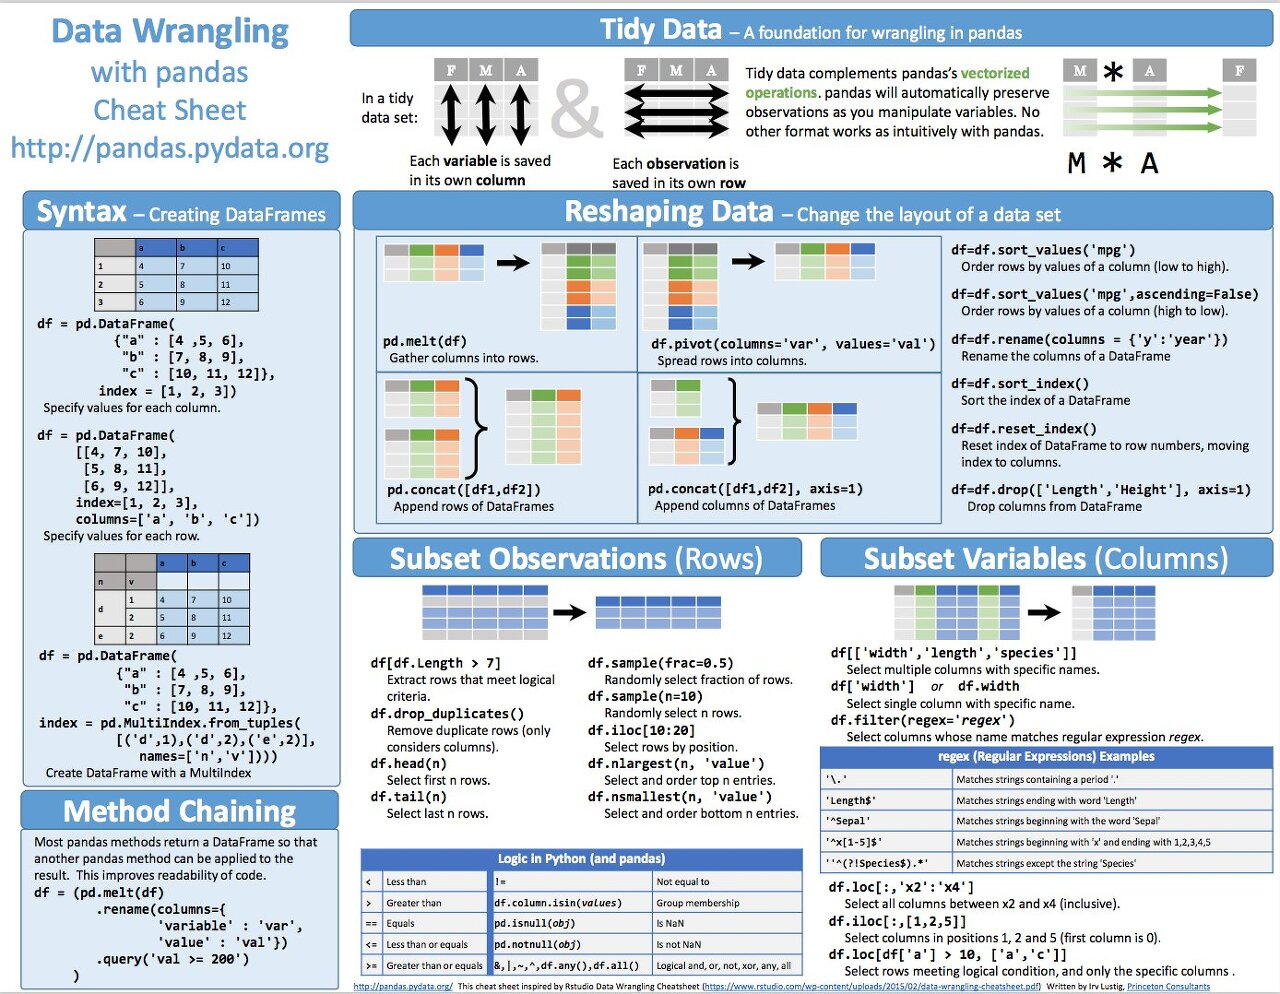

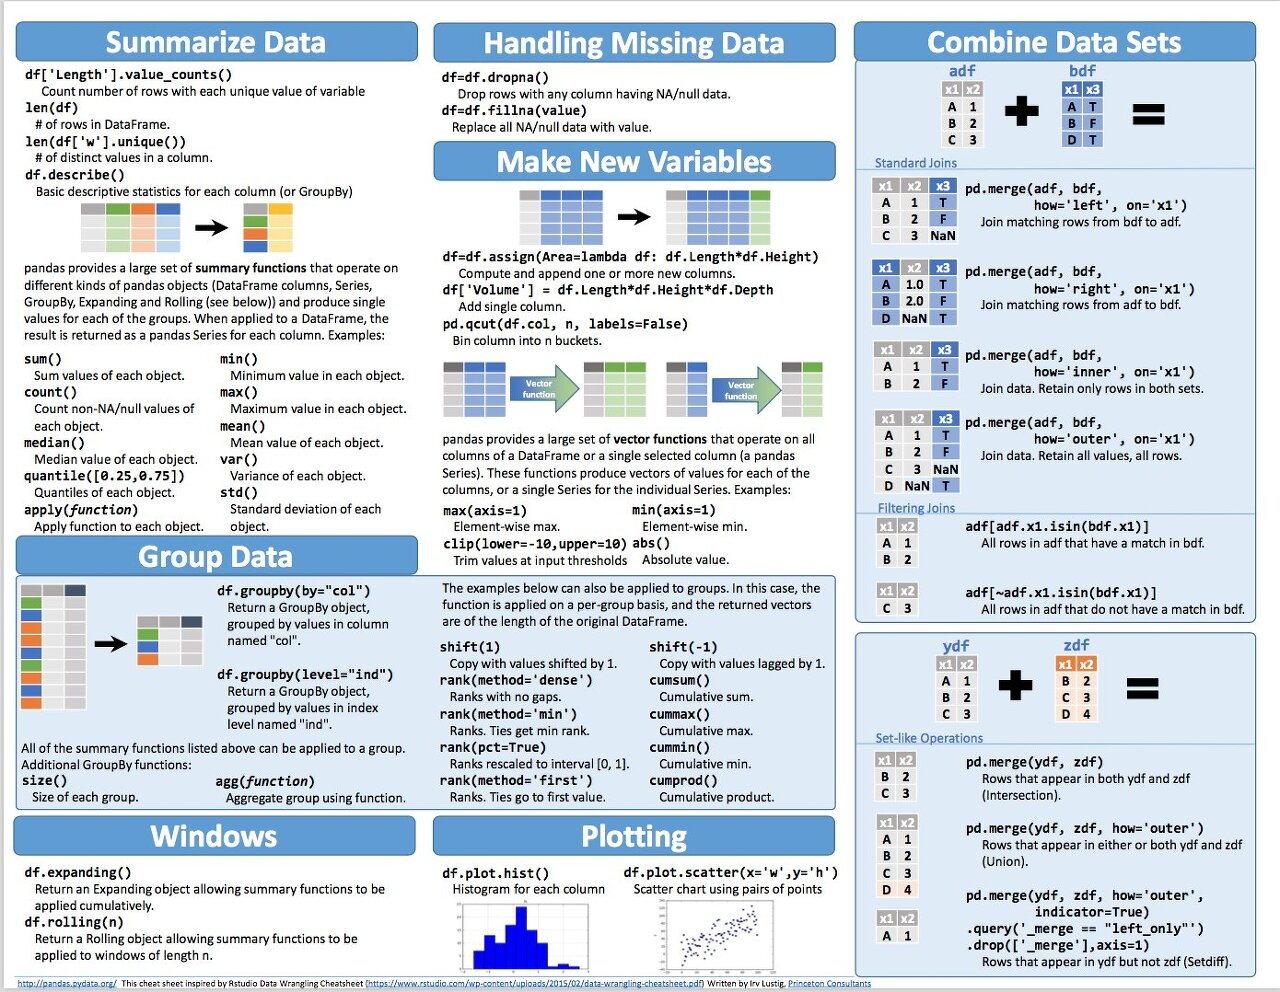

Pandas 이미지 

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Pandas User Guide

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

파이썬에서 pandas 를 사용할 때는 일반적으로 다음과 같이 pd 형태로 임포트 해서 사용다.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Pandas의 모든 api는 help 함수를 이용하여 도움말을 확인 할 수 있다.

In [ ]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [ ]:
help(pd.read_csv)

In [ ]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index or ar

In [ ]:
pd.DataFrame?

###1) Pandas 데이터 구조
Series : 1차원 배열 자료 구조

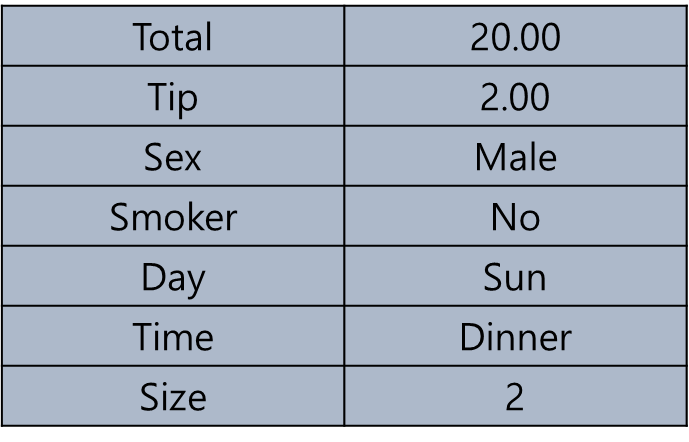

dtype : Object

DataFrame : 2차원 자료 구조(엑셀 시트구조와 비슷)
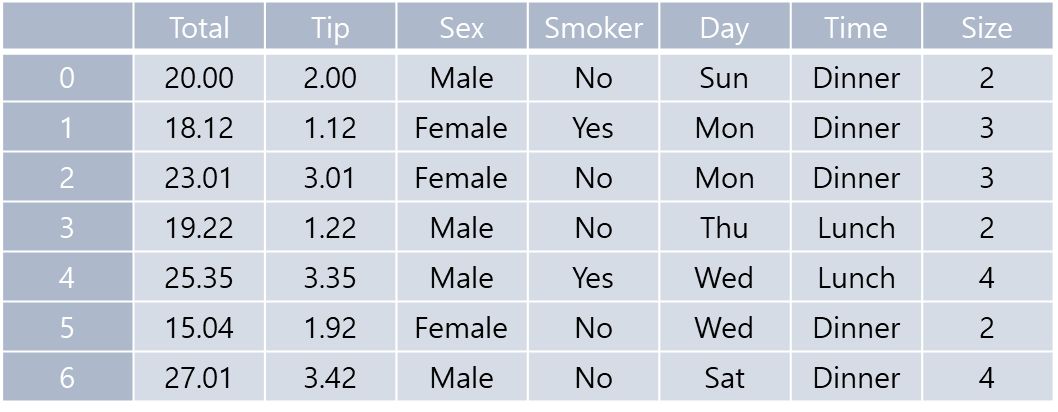

##2\. Series

- 1차원 데이터 구조
- 일반적으로 s 또는 sr 로 이름 붙임

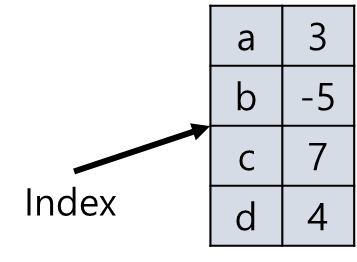

Series 는 pd.Series() 로 생성한다.

In [ ]:
s = pd.Series([3,-5,7,4])
s

0    3
1   -5
2    7
3    4
dtype: int64

인덱스를 특별히 지정해주지 않으면 Numpy 다차원배열처럼 0 부터 인덱스가 시작된다.

Numpy 다차원 배열과 다르게 Pandas Series 는 인덱스를 지정해 줄 수 있으며 숫자가 아닌 문자열도 인덱스가 될 수 있다.

In [ ]:
s = pd.Series([3,-5,7,4], index=['a','b','c','d'])
s

a    3
b   -5
c    7
d    4
dtype: int64

Type() 을 통해 데이터 타입이 Series 인걸 확인 할 수 있다.

In [ ]:
type(s)

pandas.core.series.Series

###1) 속성
Series 는 index 와 value 를 가진다.

In [ ]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
s.values

array([ 3, -5,  7,  4])

###2) 인덱싱
Series 는 요소는 index 명 또는 index의 순서를 통해 인덱싱할 수 있다.

In [ ]:
s['a']

3

In [ ]:
s[0]

3

###3) 파이썬 딕셔너리와 Pandas Series의 공통점과 차이점

index와 value 를 가진다는 점에서는 파이썬의 딕셔너리와 유사하다고 볼 수 있다.

그렇기 때문에 파이썬 딕셔너리를 통해 Series를 생성할 수 있다.

In [ ]:
pop_dict  = {'Germany':81.3,'Belgium':11.3,'France':64.3,'UK':64.9,'Netherlands':16.9}

population = pd.Series(pop_dict)
population 

Germany        81.3
Belgium        11.3
France         64.3
UK             64.9
Netherlands    16.9
dtype: float64

In [ ]:
type(population)

pandas.core.series.Series

딕셔너리에서 key 값을 이용해 value를 조회 하듯이 Series 에서 index를 이용해 value 를 조회 할 수 있다.

In [ ]:
pop_dict['France']

64.3

In [ ]:
population['France']

64.3

딕셔너리와 Series 의 차이점은 딕셔너리의 key는 순서가 없고 pandas Series 의 index는 순서가 있다는 점이다. 그렇기에 Series 는 index의 순서를 통해서도 value 조회가 가능하다.

In [ ]:
# 키 에러
pop_dict[2]

KeyError: ignored

In [ ]:
population[2]

64.3

또한 Series 는 딕셔너리와 다르게 아래와 같은 연산이 가능하다.

In [ ]:
population + 1000

Germany        1081.3
Belgium        1011.3
France         1064.3
UK             1064.9
Netherlands    1016.9
dtype: float64

In [ ]:
pop_dict * 1000

TypeError: ignored

###4) 참고 : index가 문자열에 저장된 숫자일 경우

Seriese의 요소를 조회하는데 혼돈이 올 수 있으니 숫자 index를 원할 경우
  - 문자가 아닌 정수형으로 index를 지정한다.
  - 1이 아닌 0부터 index를 지정한다.

In [ ]:
sr = pd.Series([1,2,3,4], index=['1','2','3','4'])
sr

1    1
2    2
3    3
4    4
dtype: int64

In [ ]:
#index명으로 접근
sr['1']

1

In [ ]:
#index 순서로 접근
sr[1]

2

DataFrame에서도 마찬가지로 숫자 index를 사용할 경우 염두해 두어야 한다.

##3\. DataFrame
  - 2차원 데이터 구조
  - 일반적으로 df로 이름 붙임
  - 엑셀 스프레드시트, 데이터  베이스 등과 동일한 2차원 구조
  - 가장 많이 활용하게 될 구조
  - Series가 합쳐진 형태

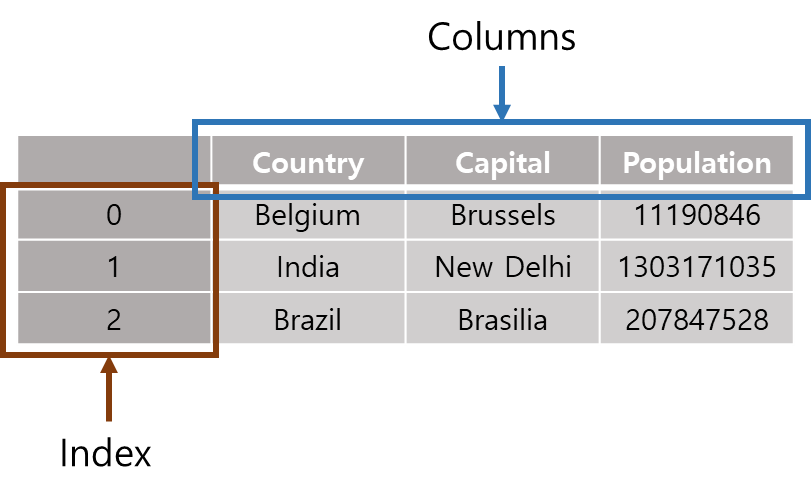

DataFrame은 pd.DataFrame()으로 생성한다
중첨된 리스트나 딕셔너리를 통해 DataFrame을 생성할 수 있다.

In [ ]:
data = [['Belgium', 'Brussels', 11190846], 
        ['India', 'New Delhi', 1303171035],
        ['Brazil', 'Brasilia', 207847528]]

df = pd.DataFrame(data)
df

0          1           2
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasilia   207847528

Columns 파라터를 통해 칼럼명 역시 정해 줄 수 있다.

In [ ]:
data = [['Belgium', 'Brussels', 11190846], 
        ['India', 'New Delhi', 1303171035],
        ['Brazil', 'Brasilia', 207847528]]

df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])
df

Country    Capital  Population
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasilia   207847528

데이터프레임의 데이터는 딕셔너리로 넘겨주는게 일반적이다.
  - 칼럼명을 함께 넘겨 줄 수 있기 때문이다.
  - 동일한 데이터타입끼리 함께 묶어서 넘겨 줄 수 있기 때문다.

In [ ]:
data = {'Country':['Belgium', 'India', 'Brazil'],
        'Capital':['Brussels', 'New Delhi', 'Brasilia'],
        'Population':[11190846,1303171035,207847528]}
df = pd.DataFrame(data, index=['aa','bb','cc'])
df

Country    Capital  Population
aa  Belgium   Brussels    11190846
bb    India  New Delhi  1303171035
cc   Brazil   Brasilia   207847528

type() 을 통해 데이터 타입이 DataFrame 인걸 확인 할 수 있다.

In [ ]:
type(df)

pandas.core.frame.DataFrame

데이터프레임의 하나의 열은 어떤 데이터구조로 되어 있을까?

In [ ]:
type(df['Country'])

pandas.core.series.Series

데이터 프레임 각 열의 데이터 타입은 Series라는 걸 알 수 있다.

###1) 속성
아래와 같은 속성을 가집니다.
- index
- columns
- dtypes
- values

In [ ]:
df.index

Index(['aa', 'bb', 'cc'], dtype='object')

In [ ]:
df.columns

Index(['Country', 'Capital', 'Population'], dtype='object')

In [ ]:
df.dtypes

Contry        object
Capital       object
Population     int64
dtype: object

In [ ]:
df.values

array([['Belgium', 'Brussels', 11190846],
       ['India', 'New Delhi', 1303171035],
       ['Brazil', 'Brasilia', 207847528]], dtype=object)

index.columns, dtypes 를 한번에 조회 하고 싶다면 info() 를 사용하면 된다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, aa to cc
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Contry      3 non-null      object
 1   Capital     3 non-null      object
 2   Population  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


특정한 칼럼은 index로 사용할 수도 있다.

In [ ]:
df

Country    Capital  Population
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasilia   207847528

In [ ]:
df_index_with_country = df.set_index('Country')
df_index_with_country

Capital  Population
Country                       
Belgium   Brussels    11190846
India    New Delhi  1303171035
Brazil    Brasilia   207847528

하나의 인덱스만 가능한것은 아니다. DataFrame 은 여러 개의 인덱스를 가질 수 있다.


In [ ]:
df_index_with_country_and_capital = df.set_index(['Country', 'Capital'])
df_index_with_country_and_capital 

Population
Country Capital              
Belgium Brussels     11190846
India   New Delhi  1303171035
Brazil  Brasilia    207847528

In [ ]:
df_index_with_country_and_capital.loc['Belgium', 'Brussels']

Population    11190846
Name: (Belgium, Brussels), dtype: int64

###2) DataFrame의 column은 어떤 데이터 타입일까 ?
기존에 학습한 데이터 프레임 생성 방식은 아래처럼 모든 데이터를 직접 명시해주는 것이었다. 

아래 코드는 각 열을 파이썬의 리스트 형태로 입력하는 방식이다. 리스트 형태로 입력된 데이터를 기반으로 판다스가 Series 를 만들고 Series 들로 DataFrame을 만드는 것이다.

In [ ]:
import pandas as pd
data = {'col1':[1,2,3,4], 'col2':[5,6,7,8], 'col3':[9,10,11,12]}
df_3 = pd.DataFrame(data, index=['A','B','C','D'])
df_3

col1  col2  col3
A     1     5     9
B     2     6    10
C     3     7    11
D     4     8    12

In [ ]:
s_1 = pd.Series([1,2,3,4], index=['A','B', 'C', 'D'])
s_2 = pd.Series([5,6,7,8], index=['A','B','C','D'])
s_3 = pd.Series([9,10,11,12], index=['A','B','C','D'])

data = {'col1': s_1, 'col2':s_2, 'col3':s_3}

data

{'col1': A    1
 B    2
 C    3
 D    4
 dtype: int64, 'col2': A    5
 B    6
 C    7
 D    8
 dtype: int64, 'col3': A     9
 B    10
 C    11
 D    12
 dtype: int64}

In [ ]:
df_4 = pd.DataFrame(data, index=['A','B','C','D'])
df_4

col1  col2  col3
A     1     5     9
B     2     6    10
C     3     7    11
D     4     8    12

###3) Numpy ndarray와 비교 
**공통점**

- Numpy 다차원배열처럼 많은 연산들이 요소들간에 이루어진다. 

In [ ]:
s = pd.Series([3,-5,4,7])
s + 10

0    13
1     5
2    14
3    17
dtype: int64

In [ ]:
df

Country    Capital  Population
aa  Belgium   Brussels    11190846
bb    India  New Delhi  1303171035
cc   Brazil   Brasilia   207847528

In [ ]:
df['Population']/1000

aa      11190.846
bb    1303171.035
cc     207847.528
Name: Population, dtype: float64

In [ ]:
df['Country'] + df['Capital']

aa    BelgiumBrussels
bb     IndiaNew Delhi
cc     BrazilBrasilia
dtype: object

**차이점**

Series 간 연산을 하는 경우 index를 기반으로 이루어진다.
(모든 Numpy 다차원배열은 shape가 동일하다면 index 도 동일하기에 index가 달라 연산이 이루어 지지 않는 경우는 없음)


In [ ]:
s

0    3
1   -5
2    4
3    7
dtype: int64

In [ ]:
s1 = s[['a','b']]
s2 = s[['b','c']]

In [ ]:
s1

a    3
b   -5
dtype: int64

In [ ]:
s2

b   -5
c    7
dtype: int64

In [ ]:
s1 + s2

a     NaN
b   -10.0
c     NaN
dtype: float64

# 실습문제
df_index_with_country 의 데이터가 주어졌을 때 각 국가의 수도 인구는 벨기에 수도 인구 대비 몇배인지 구하라

(df_index_with_country[] / df_index_with_country[])

1. 각 국가의 수도 인구를 출력하세요 

2. 벨기에 수도 인구를 출력하세요 

3. 벨기에 수도 인구 대비 몇배인지 출력하세요

# 2장 Pandas 데이터 입출력

##1\. Pandas Importing / Exporting

직접 데이터를 입력하여 dataFrame 이나 Series 를 생성할 일은 실무에서 많지 않다.
실무에서는 이미 데이터가 존재하는 경우가 많고 그 데이터를 판다스로 importing 해서 분석을 진행한다.
csv 나 엑셀형태의 파일로 저장된 데이터를 판다스로 가져오거나 직접 데이터베이스에 연결해서 데이터를 가져와서 작업하는 경우가 일반적이다.
Pandas가 지원하는 importing /exporting 포맷은 아래와 같습니다.
  - cvs (모든 text 파일 연결에 사용)
  - Excel
  - Sql (모든 데이터 베이스 연결에 사용)
  - Hdf5
  - Json
  - Html
  - Pickle
  - 기타 등등
  
Importing 함수의 경우 pd.read 형태를 가지며 exporting 함수의 경우 df.to 형태를 가진다.
  

In [ ]:
# json 데이터 로 내보내기
df.to_json

json_data = df.to_json()
json_data

'{"Country":{"aa":"Belgium","bb":"India","cc":"Brazil"},"Capital":{"aa":"Brussels","bb":"New Delhi","cc":"Brasilia"},"Population":{"aa":11190846,"bb":1303171035,"cc":207847528}}'

In [ ]:
pd.read_json(json_data)

Country    Capital  Population
aa  Belgium   Brussels    11190846
bb    India  New Delhi  1303171035
cc   Brazil   Brasilia   207847528

###1) CSV importing
하나의 파일로 관리 가능한 크기의 데이터라면, 데이터를 파일로 저장할 때 일반적으로 csv 포캣을 활용한다. csv 는 comma-separated values 의 약자이며 값들은 ,로 구분합니다.

In [ ]:
import pandas as pd

!wget -O 'iris_sample.csv' https://raw.githubusercontent.com/kys0554/bigdata/main/iris_sample.csv

df_iris_sample = pd.read_csv('iris_sample.csv')
df_iris_sample

--2022-03-30 05:40:48--  https://raw.githubusercontent.com/duc-ke/edu_jupyter_pandas/master/dataset/iris_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683 [text/plain]
Saving to: ‘iris_sample.csv’

iris_sample.csv     100%[===================>]     683  --.-KB/s    in 0s      

2022-03-30 05:40:49 (36.0 MB/s) - ‘iris_sample.csv’ saved [683/683]



sepal_length  sepal_width  petal_length  petal_width    species
0            5.1          3.5           1.4          0.2     setosa
1            4.9          3.0           1.4          0.2     setosa
2            4.7          3.2           1.3          0.2     setosa
3            4.6          3.1           1.5          0.2     setosa
4            5.0          3.6           1.4          0.2     setosa
5            5.4          3.9           1.7          0.4     setosa
6            4.6          3.4           1.4          0.3     setosa
7            5.0          3.4           1.5          0.2     setosa
8            4.4          2.9           1.4          0.2     setosa
9            4.9          3.1           1.5          0.1     setosa
10           5.4          3.7           1.5          0.2     setosa
11           4.8          3.4           1.6          0.2     setosa
12           4.8          3.0           NaN          0.1     setosa
13           4.3          3.0           1.1          0.1  virginica
14           5.8          4.0           NaN          0.2  virginica
15           5.7          NaN           1.5          0.4  virginica
16           5.4          3.9           1.3          0.4  virginica
17           5.1          3.5           NaN          0.3  virginica
18           5.7          3.8           1.7          0.3  virginica
19           5.1          3.8           1.5          0.3  virginica
20           5.1          3.5           1.4          0.2     setosa
21           4.9          3.0           1.4          0.2     setosa
22           4.7          3.2           1.3          0.2     setosa
23           5.1          3.5           1.4          0.2  virginica
24           4.9          3.0           1.4          0.2  virginica
25           4.7          3.2           1.3          0.2  virginica

csv 뿐만 아니라 tsv, txt 도 read_csv() 파일을 통해 읽어 올 수 있다.
파일 관점에서 보면  csv, tsv, txt 는 동일합니다. Csv,tsv 역시 txt 파일이며 값을 구분하는 구분자가 콤마냐 탭이냐의 차이다.

In [53]:
!wget -O 'iris_sample.txt' https://raw.githubusercontent.com/kys0554/bigdata/main/iris_sample.csv


--2022-03-30 07:43:59--  https://raw.githubusercontent.com/kys0554/bigdata/main/iris_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683 [text/plain]
Saving to: ‘iris_sample.txt’

iris_sample.txt     100%[===================>]     683  --.-KB/s    in 0s      

2022-03-30 07:44:00 (53.4 MB/s) - ‘iris_sample.txt’ saved [683/683]



In [54]:
df_iris_sample = pd.read_csv('iris_sample.txt')
df_iris_sample

sepal_length  sepal_width  petal_length  petal_width    species
0            5.1          3.5           1.4          0.2     setosa
1            4.9          3.0           1.4          0.2     setosa
2            4.7          3.2           1.3          0.2     setosa
3            4.6          3.1           1.5          0.2     setosa
4            5.0          3.6           1.4          0.2     setosa
5            5.4          3.9           1.7          0.4     setosa
6            4.6          3.4           1.4          0.3     setosa
7            5.0          3.4           1.5          0.2     setosa
8            4.4          2.9           1.4          0.2     setosa
9            4.9          3.1           1.5          0.1     setosa
10           5.4          3.7           1.5          0.2     setosa
11           4.8          3.4           1.6          0.2     setosa
12           4.8          3.0           NaN          0.1     setosa
13           4.3          3.0           1.1          0.1  virginica
14           5.8          4.0           NaN          0.2  virginica
15           5.7          NaN           1.5          0.4  virginica
16           5.4          3.9           1.3          0.4  virginica
17           5.1          3.5           NaN          0.3  virginica
18           5.7          3.8           1.7          0.3  virginica
19           5.1          3.8           1.5          0.3  virginica
20           5.1          3.5           1.4          0.2     setosa
21           4.9          3.0           1.4          0.2     setosa
22           4.7          3.2           1.3          0.2     setosa
23           5.1          3.5           1.4          0.2  virginica
24           4.9          3.0           1.4          0.2  virginica
25           4.7          3.2           1.3          0.2  virginica

###2) TSV importing
tsv 는 tab-separated values 의 약자이며 값들을 tab으로 구분한다.


In [57]:
!wget -O 'iris_sample.tsv' https://raw.githubusercontent.com/kys0554/bigdata/main/iris_sample.csv

--2022-03-30 07:47:46--  https://raw.githubusercontent.com/kys0554/bigdata/main/iris_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683 [text/plain]
Saving to: ‘iris_sample.tsv’

iris_sample.tsv     100%[===================>]     683  --.-KB/s    in 0s      

2022-03-30 07:47:46 (58.1 MB/s) - ‘iris_sample.tsv’ saved [683/683]



In [64]:
df_iris_sample = pd.read_csv('iris_sample.tsv')
df_iris_sample

sepal_length  sepal_width  petal_length  petal_width    species
0            5.1          3.5           1.4          0.2     setosa
1            4.9          3.0           1.4          0.2     setosa
2            4.7          3.2           1.3          0.2     setosa
3            4.6          3.1           1.5          0.2     setosa
4            5.0          3.6           1.4          0.2     setosa
5            5.4          3.9           1.7          0.4     setosa
6            4.6          3.4           1.4          0.3     setosa
7            5.0          3.4           1.5          0.2     setosa
8            4.4          2.9           1.4          0.2     setosa
9            4.9          3.1           1.5          0.1     setosa
10           5.4          3.7           1.5          0.2     setosa
11           4.8          3.4           1.6          0.2     setosa
12           4.8          3.0           NaN          0.1     setosa
13           4.3          3.0           1.1          0.1  virginica
14           5.8          4.0           NaN          0.2  virginica
15           5.7          NaN           1.5          0.4  virginica
16           5.4          3.9           1.3          0.4  virginica
17           5.1          3.5           NaN          0.3  virginica
18           5.7          3.8           1.7          0.3  virginica
19           5.1          3.8           1.5          0.3  virginica
20           5.1          3.5           1.4          0.2     setosa
21           4.9          3.0           1.4          0.2     setosa
22           4.7          3.2           1.3          0.2     setosa
23           5.1          3.5           1.4          0.2  virginica
24           4.9          3.0           1.4          0.2  virginica
25           4.7          3.2           1.3          0.2  virginica

In [61]:
#df_iris_sample = pd.read_csv('iris_sample.txt', sep="\t")
#df_iris_sample

###3) Exporting
csv 를 통해 생성한 df_iris_sample 에서 첫 5행만 'iris_sample_2.csv'로 저장해 보자.
	


In [66]:
df_iris_sample.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [73]:
df_iris_sample_2 = df_iris_sample.head()
df_iris_sample_2

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [74]:
df_iris_sample_2.to_csv('df_iris_sample_2.csv')

잘 저장 되었는지 확인 한다.

In [75]:
pd.read_csv('df_iris_sample_2.csv')

Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width species
0           0           5.1          3.5           1.4          0.2  setosa
1           1           4.9          3.0           1.4          0.2  setosa
2           2           4.7          3.2           1.3          0.2  setosa
3           3           4.6          3.1           1.5          0.2  setosa
4           4           5.0          3.6           1.4          0.2  setosa

Unnamed:0 라는 열이 들어가 있다. 이는 to_csv()시 index 도 함께 파일에 저장되기에 생기는 문제다.	저장시 index=False 를 통해 이 문제를 해결 할 수 있다.


In [78]:
df_iris_sample_2.to_csv('df_iris_sample_2_no_index.csv', index=False)

In [79]:
pd.read_csv('df_iris_sample_2_no_index.csv')

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

txt, tvs 도 csv 와 동일하게 to_csv() 로 다룰 수 있다.

#3장 Pandas 데이터 다루기

#4장 Pandas 함수
